# Results Data

This section will explain how to viasualize and extract results from the MobsPy simulation object.

We start with a simple model:

Compiling model
Starting Simulator
/Users/mfuegger/Github/ROBACON/mobspy/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Simulation is Over


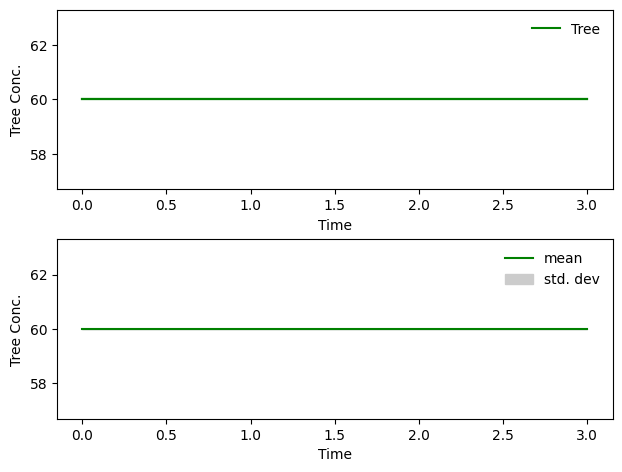

In [1]:
from mobspy import *

Color, Disease = BaseSpecies()

Color.blue, Color.red, Color.yellow
Disease.not_sick, Disease.sick

Disease.not_sick >> Disease.sick [1]

Tree = Color*Disease

Tree.yellow(20), Tree.red(20), Tree.blue(20)

S = Simulation(Tree)
S.method = 'stochastic'
S.repetitions = 3
S.step_size = 0.25
S.duration = 3
S.run()

The default plot does not reveal much, as the number of Trees remains constant throughout the simulation.
However, MobPy possesses three plotting methods available to the user: `plot`, `plot_stochastic`, and `plot_raw`. 
The `plot` function plots all runs for all species together in the same figure. The `plot_stochastic` function plots two figures for each species, one for the runs and the other for the average and standard deviation of the runs of each species. The `plot_raw` function is more complex so that it will be discussed in another section.

Furthermore, both `plot` and `plot_stochastic` accept the dot operator in meta-species used as its arguments. The user is then capable of plotting specific states of meta-species. To continue our example, we plot all instances of Tree which are not sick (`Tree.not_sick.blue`, `Tree.not_sick.red`, `Tree.not_sick.yellow`) and which are sick (`Tree.sick.blue`, `Tree.sick.red`, `Tree.sick.yellow`):

MobsPy disregards time-series that have already finished during calculations
MobsPy disregards time-series that have already finished during calculations


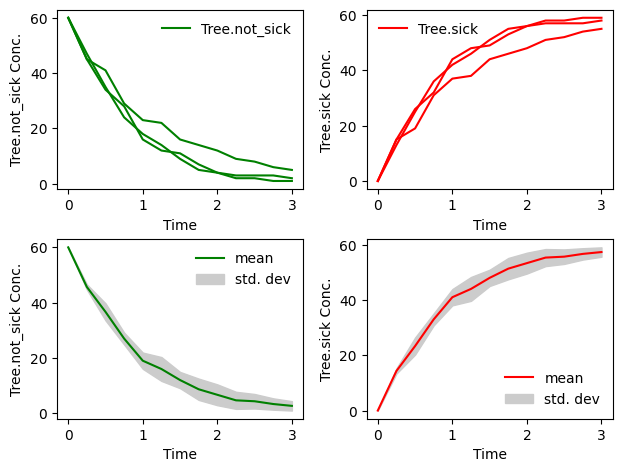

In [2]:
S.plot_stochastic(Tree.not_sick, Tree.sick)

We also show the same example with the `plot` function:

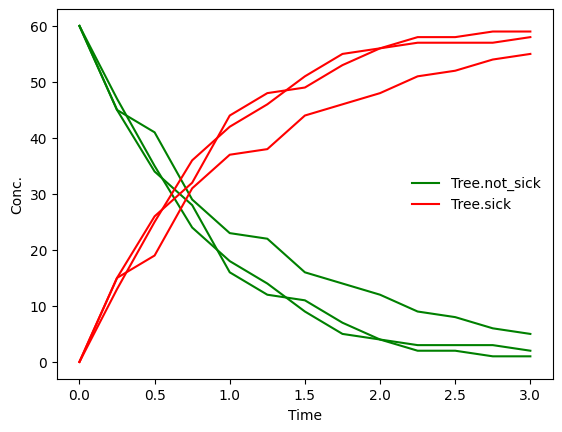

In [3]:
S.plot(Tree.not_sick, Tree.sick)

One can also access the data directly from the simulation object using the meta-species objects or strings. 
Similarly to the plotting function you can perform queries in the result data. Below, we show an example to acess the data directly:

In [4]:
R = S.results
print('Tree: \n', R[Tree])
print('Tree.not_sick: \n', R[Tree.not_sick])
print('Tree.sick: \n', R['Tree.sick'])
print('Tree.sick.blue: \n', R['Tree.sick.blue'])

Tree: 
 [[60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]]
Tree.not_sick: 
 [[60.0, 45.0, 34.0, 28.0, 16.0, 12.0, 11.0, 7.0, 4.0, 2.0, 2.0, 1.0, 1.0], [60.0, 45.0, 41.0, 29.0, 23.0, 22.0, 16.0, 14.0, 12.0, 9.0, 8.0, 6.0, 5.0], [60.0, 47.0, 35.0, 24.0, 18.0, 14.0, 9.0, 5.0, 4.0, 3.0, 3.0, 3.0, 2.0]]
Tree.sick: 
 [[0.0, 15.0, 26.0, 32.0, 44.0, 48.0, 49.0, 53.0, 56.0, 58.0, 58.0, 59.0, 59.0], [0.0, 15.0, 19.0, 31.0, 37.0, 38.0, 44.0, 46.0, 48.0, 51.0, 52.0, 54.0, 55.0], [0.0, 13.0, 25.0, 36.0, 42.0, 46.0, 51.0, 55.0, 56.0, 57.0, 57.0, 57.0, 58.0]]
Tree.sick.blue: 
 [[0.0, 9.0, 12.0, 12.0, 15.0, 16.0, 16.0, 18.0, 19.0, 20.0, 20.0, 20.0, 20.0], [0.0, 3.0, 6.0, 8.0, 10.0, 10.0, 13.0, 14.0, 14.0, 15.0, 16.0, 18.0, 18.0], [0.0, 6.0, 12.0, 12.0, 16.0, 16.0, 16.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0]]


The get item `S.results[Meta_Species_Name]` will return a list of lists with all the runs performed in the simulation. 
However, for cases containing a single run (1 repetition), the following method we will present is more useful. The method `fres` from the simulation object access directly the first results the simulation object. See it in the example below:

In [5]:
R = S.fres
print('Tree: \n', R[Tree])
print('Tree.not_sick: \n', R[Tree.not_sick])
print('Tree.sick: \n', R['Tree.sick'])
print('Tree.sick.blue: \n', R['Tree.sick.blue'])

Tree: 
 [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
Tree.not_sick: 
 [60.0, 45.0, 34.0, 28.0, 16.0, 12.0, 11.0, 7.0, 4.0, 2.0, 2.0, 1.0, 1.0]
Tree.sick: 
 [0.0, 15.0, 26.0, 32.0, 44.0, 48.0, 49.0, 53.0, 56.0, 58.0, 58.0, 59.0, 59.0]
Tree.sick.blue: 
 [0.0, 9.0, 12.0, 12.0, 15.0, 16.0, 16.0, 18.0, 19.0, 20.0, 20.0, 20.0, 20.0]
